In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = 3*X[:,0]**2 + 0.05 *np.random.randn(100)


In [13]:
X.shape

(100, 1)

In [12]:
df = pd.DataFrame()
df["X"]=X.reshape(100)

In [14]:
df["y"] = y
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


In [15]:
df["y_pred1"] = df["y"].mean()
df

,X,y,y_pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [16]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
dtr2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [18]:
df["res1"] = df["y"] - df["y_pred1"]
df

,X,y,y_pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


In [25]:
dtr2.fit(df["X"].values.reshape(100,1),df["res1"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

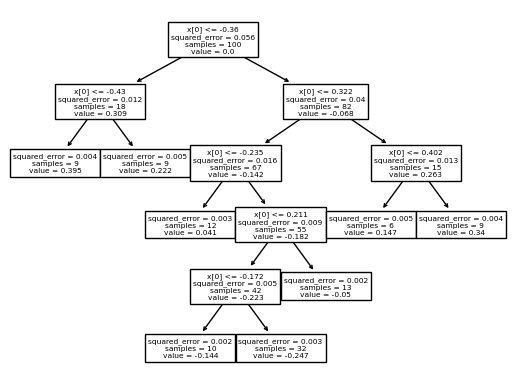

In [27]:
from sklearn.tree import plot_tree
plot_tree(dtr2)
plt.show()

In [34]:
X_test = np.linspace(-0.5,0.5,100)


In [41]:
y_pred = 0.265458 + dtr2.predict(X_test.reshape(-1,1))

In [42]:
y_pred2 = 0.265458 + dtr2.predict(df["X"].values.reshape(100,1))

In [43]:
df["y_pred2"] = y_pred2

In [44]:
df

,X,y,y_pred1,res1,y_pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,-0.609339
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.066432
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.494860
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.731090
4,-0.343981,0.343986,0.265458,0.078528,0.305964,-0.316926
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.646559
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.608188
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,-0.573075
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.083632


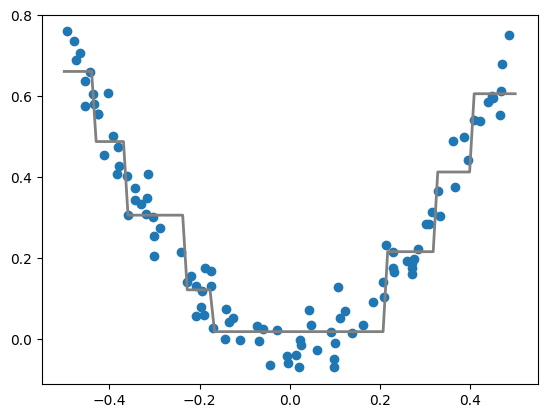

In [45]:
plt.plot(X_test,y_pred,linewidth=2,color = 'grey')
plt.scatter(X,y)

In [46]:
df["res2"] = df["y"] - df["y_pred2"]
df

,X,y,y_pred1,res1,y_pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [47]:
dtr3 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr3.fit(df["X"].values.reshape(100,1),df["res2"].values.reshape(100,1))

DecisionTreeRegressor(max_leaf_nodes=8)

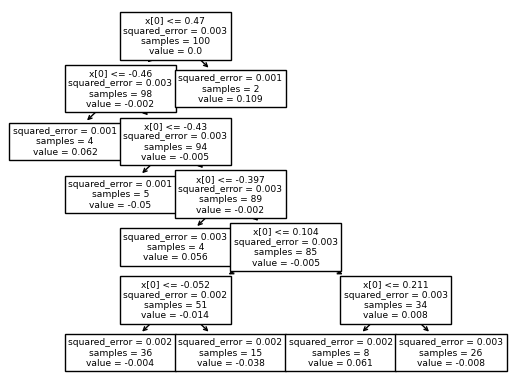

In [49]:
plot_tree(dtr3)
plt.show()

In [55]:
y_pred3 = 0.265458 + sum(regressor.predict(X_test.reshape(100,1)) for regressor in [dtr2,dtr3])

In [56]:
df["y_pred3"] = y_pred3

In [59]:
df

,X,y,y_pred1,res1,y_pred2,res2,y_pred3,res3
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254,0.722987,-0.671414
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404,0.722987,-0.128507
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732,0.722987,-0.556936
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497,0.722987,-0.793165
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022,0.611252,-0.267266
...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994,0.597523,-0.638198
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624,0.597523,-0.599828
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489,0.714576,-0.681767
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604,0.714576,-0.025060


In [58]:
df["res3"] = df["y"] - df["y_pred3"]
df

,X,y,y_pred1,res1,y_pred2,res2,y_pred3,res3
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254,0.722987,-0.671414
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404,0.722987,-0.128507
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732,0.722987,-0.556936
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497,0.722987,-0.793165
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022,0.611252,-0.267266
...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994,0.597523,-0.638198
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624,0.597523,-0.599828
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489,0.714576,-0.681767
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604,0.714576,-0.025060


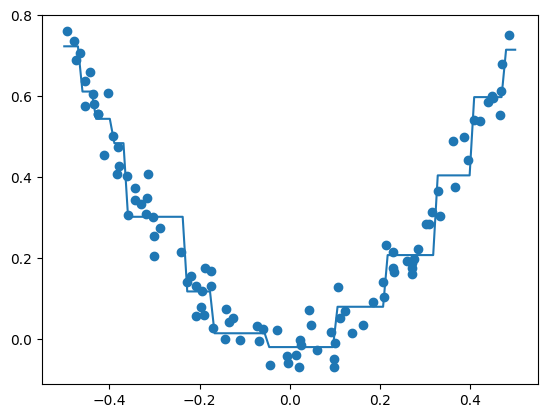

In [61]:
plt.plot(X_test,df["y_pred3"])
plt.scatter(df["X"],df["y"])